# Projet 3

**Énoncé**

L'agence "Santé publique France" a lancé un appel à projets pour trouver des idées innovantes d’applications en lien avec l'alimentation. Vous souhaitez y participer et proposer une idée d’application.

**Les données**

Extrait de l’appel à projets :

Le jeu de données Open Food Facts est disponible sur le  [Site officiel](https://world.openfoodfacts.org) 
(ou disponible à [ce lien](https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/parcours-data-scientist/P2/fr.openfoodfacts.org.products.csv.zip) en téléchargement). 
Les variables sont définies à [cette adresse](https://world.openfoodfacts.org/data/data-fields.txt).

Les champs sont séparés en quatre sections :

  *   Les informations générales sur la fiche du produit : nom, date de modification, etc.
  *   Un ensemble de tags : catégorie du produit, localisation, origine, etc.
  *   Les ingrédients composant les produits et leurs additifs éventuels.
  *   Des informations nutritionnelles : quantité en grammes d’un nutriment pour 100 grammes du produit.

**Mission**

Après avoir lu l’appel à projets, voici les différentes étapes que vous avez identifiées :

1) Traiter le jeu de données, en :

Réfléchissant à une idée d’application.
Repérant des variables pertinentes pour les traitements à venir, et nécessaires pour votre idée d’application.
Nettoyant les données en :
    mettant en évidence les éventuelles valeurs manquantes, avec au moins 3 méthodes de traitement adaptées aux variables concernées,
    identifiant et en quantifiant les éventuelles valeurs aberrantes de chaque variable.
Automatisant ces traitements pour éviter de répéter ces opérations
Le programme doit fonctionner si la base de données est légèrement modifiée (ajout d’entrées, par exemple).

2) Tout au long de l’analyse, produire des visualisations afin de mieux comprendre les données. Effectuer une analyse univariée pour chaque variable intéressante, afin de synthétiser son comportement.

L’appel à projets spécifie que l’analyse doit être simple à comprendre pour un public néophyte. Soyez donc attentif à la lisibilité : taille des textes, choix des couleurs, netteté suffisante, et variez les graphiques (boxplots, histogrammes, diagrammes circulaires, nuages de points…) pour illustrer au mieux votre propos.

3) Confirmer ou infirmer les hypothèses à l’aide d’une analyse multivariée. Effectuer les tests statistiques appropriés pour vérifier la significativité des résultats.

4) Justifier votre idée d’application. Identifier des arguments justifiant la faisabilité (ou non) de l’application à partir des données Open Food Facts.

5) Rédiger un rapport d’exploration et pitcher votre idée durant la soutenance du projet.

**Livrables attendus**

Un **notebook du nettoyage** des données (non cleané, pour comprendre votre démarche). 

Un **notebook d’exploration** comportant une analyse univariée, multivariée, une réduction dimensionnelle, ainsi que les différentes questions de recherches associées (non cleané, pour comprendre votre démarche).

Une **présentation**, à utiliser en support pour la soutenance, comprenant :

 *   La présentation de votre idée d’application.
 *   Les opérations de nettoyage effectuées.
 *   La description et l'analyse univariée des différentes variables importantes avec les visualisations associées.
 *   L’analyse multivariée et les résultats statistiques associés, en lien avec votre idée d’application.
 *   3 observations solidement étayées (graphes et/ou tests statistiques à l’appui au besoin) évaluant la pertinence et la faisabilité de votre application.
 *   La synthèse des différentes conclusions sur la faisabilité de votre projet.

# Application 

**Courses écolo-healthy :**
 

*   Pour votre santé, évitez de manger trop gras, trop sucré, trop salé 
*   Pour votre santé préviliger les fibres et les vitamines
*   Pour protéger votre environnement, éviter les déchets polluants
*   Pour votre pays, manger des produits français

Un utilisateur fait ses courses. Il se connecte à l'application et saisit les produits qu'il veut acheter.

L'application lui recommande les produits les plus saines et les moins polluants.

# Notebook de nettoyage

In [1]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import seaborn as sns
import matplotlib as mpl
import sys
import IPython as ip
import sklearn
import datetime
import re
import missingno as msno
from termcolor import colored

from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler




from matplotlib.ticker import AutoMinorLocator
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')




# Jeu de données

In [2]:
data = pd.read_csv('fr.openfoodfacts.org.products.csv',sep='\t', low_memory=False)

In [3]:
# grader une copie du dataframe
#df_food=data.copy()

In [4]:
data.head(5)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,0000000016087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,0000000016094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Columns: 162 entries, code to water-hardness_100g
dtypes: float64(106), object(56)
memory usage: 396.5+ MB


In [6]:
data.describe()

,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutrition_grade_uk,energy_100g,energy-from-fat_100g,fat_100g,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
count,0.0,248939.000000,248939.000000,0.0,248939.000000,0.0,0.0,2.611130e+05,857.000000,243891.000000,...,49.000000,3036.000000,165.000000,948.000000,0.0,268.000000,221210.000000,221210.000000,0.0,0.0
mean,NaN,1.936024,0.019659,NaN,0.055246,NaN,NaN,1.141915e+03,585.501214,12.730379,...,6.425698,31.458587,15.412121,49.547785,NaN,341.700764,9.165535,9.058049,NaN,NaN
std,NaN,2.502019,0.140524,NaN,0.269207,NaN,NaN,6.447154e+03,712.809943,17.578747,...,2.047841,31.967918,3.753028,18.757932,NaN,425.211439,9.055903,9.183589,NaN,NaN
min,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,8.000000,6.000000,NaN,0.000000,-15.000000,-15.000000,NaN,NaN
25%,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,3.770000e+02,49.400000,0.000000,...,6.300000,0.000000,12.000000,32.000000,NaN,98.750000,1.000000,1.000000,NaN,NaN
50%,NaN,1.000000,0.000000,NaN,0.000000,NaN,NaN,1.100000e+03,300.000000,5.000000,...,7.200000,23.000000,15.000000,50.000000,NaN,195.750000,10.000000,9.000000,NaN,NaN
75%,NaN,3.000000,0.000000,NaN,0.000000,NaN,NaN,1.674000e+03,898.000000,20.000000,...,7.400000,51.000000,15.000000,64.250000,NaN,383.200000,16.000000,16.000000,NaN,NaN
max,NaN,31.000000,2.000000,NaN,6.000000,NaN,NaN,3.251373e+06,3830.000000,714.290000,...,8.400000,100.000000,25.000000,100.000000,NaN,2842.000000,40.000000,40.000000,NaN,NaN


In [7]:
print('1 ------------------------------------------------------------------------')
print ('Il y a ', data.shape[0], 'lignes et ', data.shape[1],'colonnes dans la base ')
# données manquantes par colonnes
print('2 ------------------------------------------------------------------------')
print('Le nombre de données manquantes par colonnes : \n',data.isna().sum())
# données manquantes dans toute la base
print('3 ------------------------------------------------------------------------')
print('Le nombre total de données manquantes est : \n',data.isna().sum().sum())
# pourcentage des données manquantes 
print('4 ------------------------------------------------------------------------')
print('Le pourcentage des données manquantes est : \n',round(data.isna().mean().mean()*100,2),'%')
# nombre de doublons sur toutes les colonnes
if data.duplicated().unique():
    print ('Il y a ', data.duplicated().sum(), 'lignes dupliquées')
else:
    print('Il n\'y a pas de doublons dans cette base')

1 ------------------------------------------------------------------------
Il y a  320772 lignes et  162 colonnes dans la base 
2 ------------------------------------------------------------------------
Le nombre de données manquantes par colonnes : 
 code                           23
url                            23
creator                         2
created_t                       3
created_datetime                9
                            ...  
carbon-footprint_100g      320504
nutrition-score-fr_100g     99562
nutrition-score-uk_100g     99562
glycemic-index_100g        320772
water-hardness_100g        320772
Length: 162, dtype: int64
3 ------------------------------------------------------------------------
Le nombre total de données manquantes est : 
 39608589
4 ------------------------------------------------------------------------
Le pourcentage des données manquantes est : 
 76.22 %
Il n'y a pas de doublons dans cette base


In [8]:
# liste des colonnes
listCol = data.columns.tolist()
listCol

['code',
 'url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'product_name',
 'generic_name',
 'quantity',
 'packaging',
 'packaging_tags',
 'brands',
 'brands_tags',
 'categories',
 'categories_tags',
 'categories_fr',
 'origins',
 'origins_tags',
 'manufacturing_places',
 'manufacturing_places_tags',
 'labels',
 'labels_tags',
 'labels_fr',
 'emb_codes',
 'emb_codes_tags',
 'first_packaging_code_geo',
 'cities',
 'cities_tags',
 'purchase_places',
 'stores',
 'countries',
 'countries_tags',
 'countries_fr',
 'ingredients_text',
 'allergens',
 'allergens_fr',
 'traces',
 'traces_tags',
 'traces_fr',
 'serving_size',
 'no_nutriments',
 'additives_n',
 'additives',
 'additives_tags',
 'additives_fr',
 'ingredients_from_palm_oil_n',
 'ingredients_from_palm_oil',
 'ingredients_from_palm_oil_tags',
 'ingredients_that_may_be_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil',
 'ingredients_that_may_be_from_palm_oil_tags',
 'nutritio

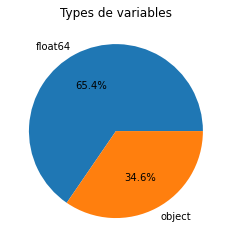

In [9]:
# Pie plot types de colonnes
data.dtypes.value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Types de variables')
plt.ylabel('')
fichier ='pieplot_type_variable'+'.png'
plt.savefig(fichier)
plt.show()

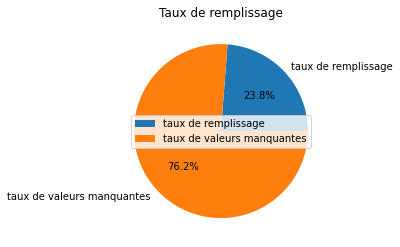

In [10]:
# Pie plot taux de remplissage du jeu de données
pd.DataFrame({'remplissage':[data.notna().mean().mean(),data.isna().mean().mean()]},index=['taux de remplissage','taux de valeurs manquantes']).plot.pie(autopct='%1.1f%%',subplots=True)
plt.title('Taux de remplissage')
plt.ylabel('')
plt.legend(loc='center')
fichier ='pieplot_remplissage'+'.png'
plt.savefig(fichier)
plt.show()


# Sélectionner les produits en France

In [11]:
# Tester si une des colonnes "countries","countries_tags"  et "countries_fr"]] contient les mots "france" ou "fr", flags=re.IGNORECASE, na=False, regex=True)
mask_france = data["countries"].str.contains("france|fr", flags=re.IGNORECASE, na=False, regex=True)

In [12]:
data_france = data[mask_france]
print('Le nombre de produits restant est :',data_france.shape[0])

Le nombre de produits restant est : 98468


# Supprimer les colonnes vides

In [13]:
# remplacer les valeurs "" par nan_value
nan_value = float("NaN")
data_france.replace("", nan_value, inplace=True)
# supprimer les colonnes vides
data_france.dropna(how='all', axis=1, inplace=True)
data_france.shape

(98468, 136)

# Supprimer les lignes vides

In [14]:
# supprimer les lignes ne contenant que des informations générales (code, url, nom...)
data_france.iloc[:,8:].dropna(how='all', axis=0, inplace=True)
data_france.shape

(98468, 136)

# Supprimer les lignes dupliquées

In [15]:
# supprimer les doublons
data_france.drop_duplicates(subset='code', inplace=True)
print ('Il y a ', data_france.shape[0], 'lignes et ', data_france.shape[1],'colonnes dans la base ')

Il y a  98468 lignes et  136 colonnes dans la base 


# Supprimer les plats préparés

In [16]:
data_france.drop(data_france.loc[data_france['main_category_fr']=='Plats préparés'].index, inplace=True)

In [17]:
data_france.shape

(96710, 136)

# Rechercher les colonnes par mots clés

In [18]:
data_france1=data_france.copy()

In [19]:
# chercher les mots-clés définis dans les colonnes 
liste_colonnes_100g= data_france.filter(regex=("100g")).columns
liste_colonnes_energy= data_france.filter(regex=("energy")).columns
liste_colonnes_score= data_france.filter(regex=("score")).columns

liste_colonnes = [item for item in liste_colonnes_100g if item not in liste_colonnes_energy if item not in liste_colonnes_score]

#nutrition_list = [col for col in data_raw_france_without_empty_col.columns 
                  #if col.endswith("_100g") and not col.startswith(("carbon", "energy", "nutrition", "ph"))]

    
# Afficher le nombre de colonnes trouvées
print('Nous avons', len(liste_colonnes), 'colonnes')

Nous avons 75 colonnes


In [20]:
data_france.shape

(96710, 136)

# Sélection des colonnes utiles

In [21]:
# Sélection des colonnes en les mettant dans des groupes
informations = ['code', 'image_url', 'product_name'] #, 'quantity'

categories = ['main_category_fr','pnns_groups_1','pnns_groups_2']

emballage=['packaging']

energie = ['energy_100g','energy-from-fat_100g']

nutri_score = ['nutrition-score-fr_100g','nutrition_grade_fr']

sucre = ['sugars_100g', 'sucrose_100g', 'glucose_100g', 'fructose_100g', 'lactose_100g','maltose_100g']

sel = ['salt_100g']

graisse = ['fat_100g']

fibre = ['fiber_100g']

proteine = ['proteins_100g']

vitamine = ['vitamin-a_100g', 'vitamin-d_100g', 'vitamin-e_100g', 'vitamin-k_100g', 'vitamin-c_100g', 'vitamin-b1_100g', 'vitamin-b2_100g', 'vitamin-pp_100g', 'vitamin-b6_100g', 'vitamin-b9_100g',  'vitamin-b12_100g']

additifs = ['additives_n']

In [22]:
data_france = data_france[informations + categories + emballage + energie + nutri_score + sucre + sel + graisse + fibre + proteine + vitamine + additifs]

In [23]:
data_france.shape

(96710, 33)

# Imputation des valeurs manquantes

<AxesSubplot:>

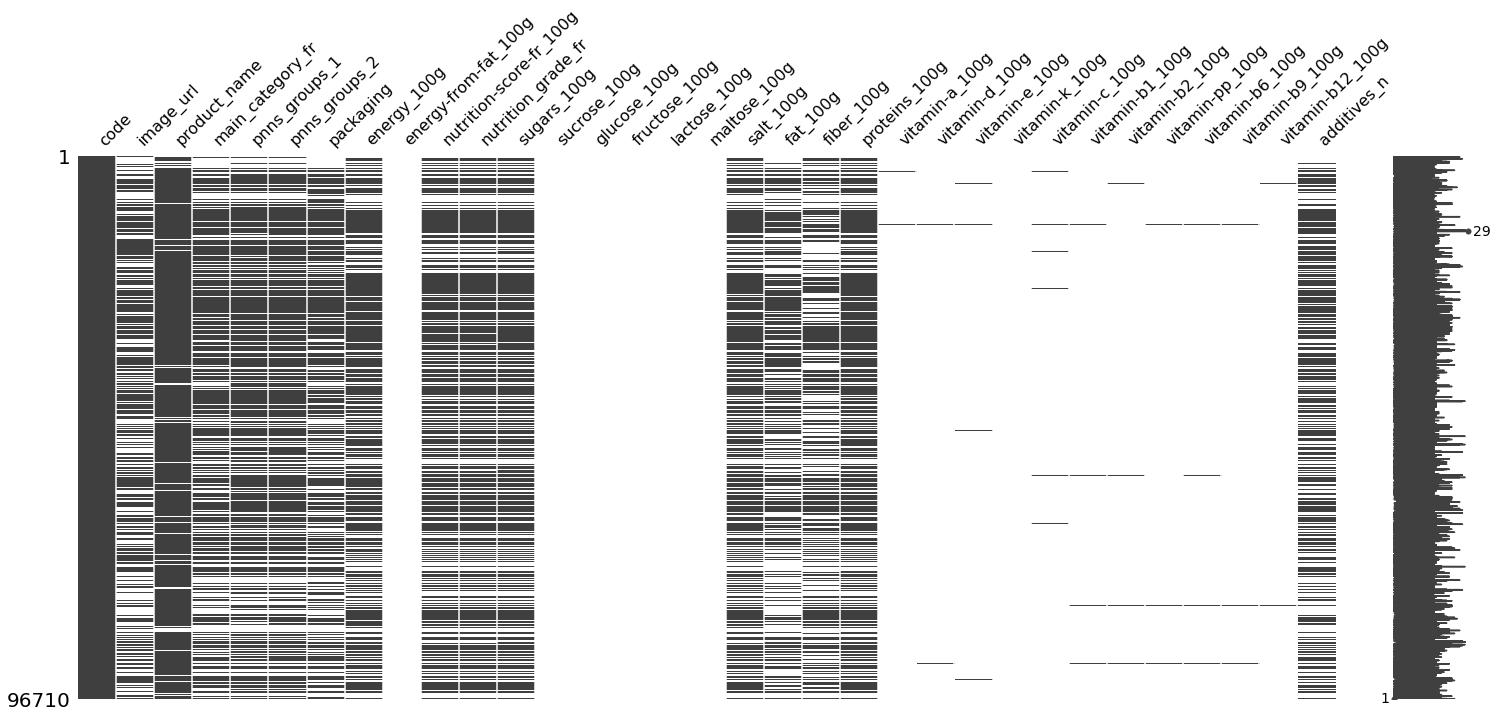

In [24]:
msno.matrix(data_france)

<AxesSubplot:>

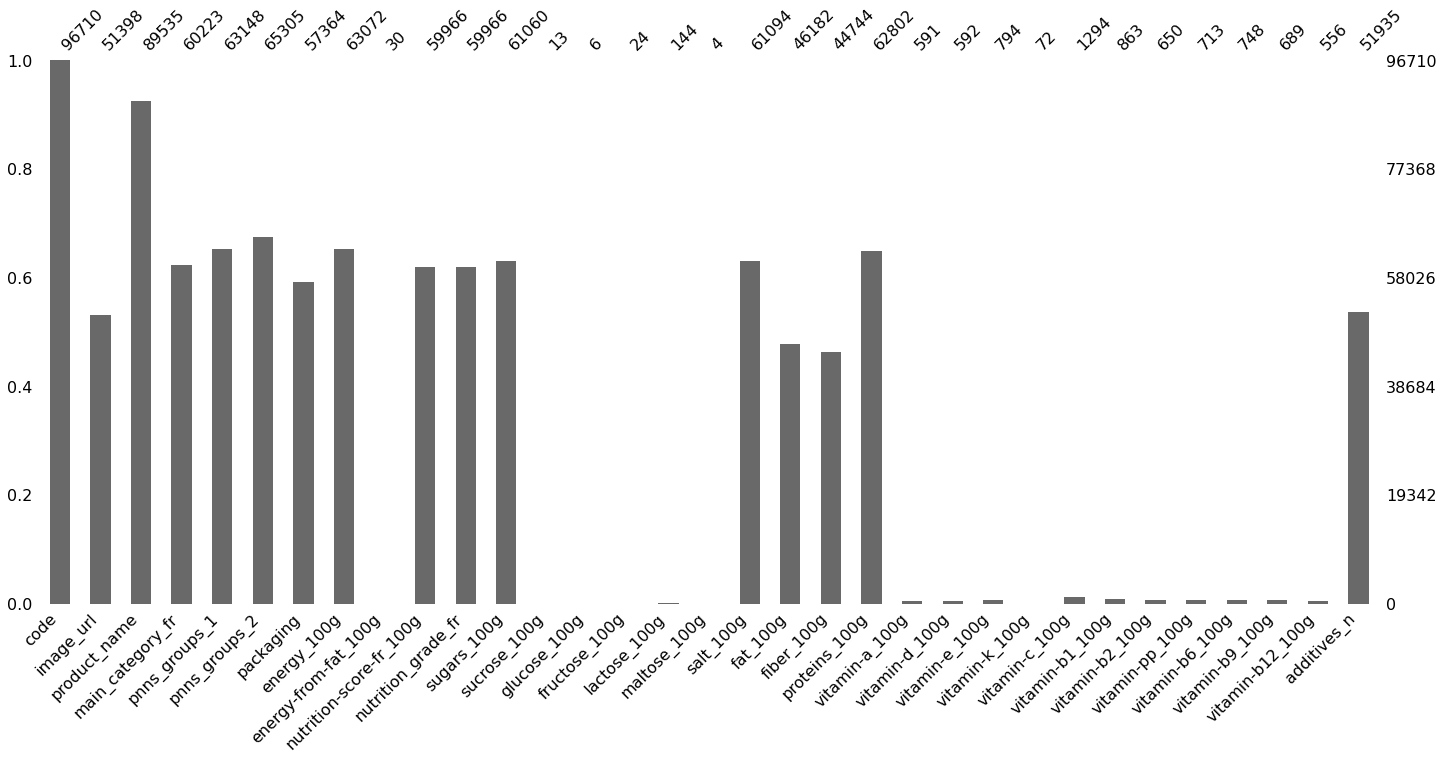

In [25]:
msno.bar(data_france)

<AxesSubplot:>

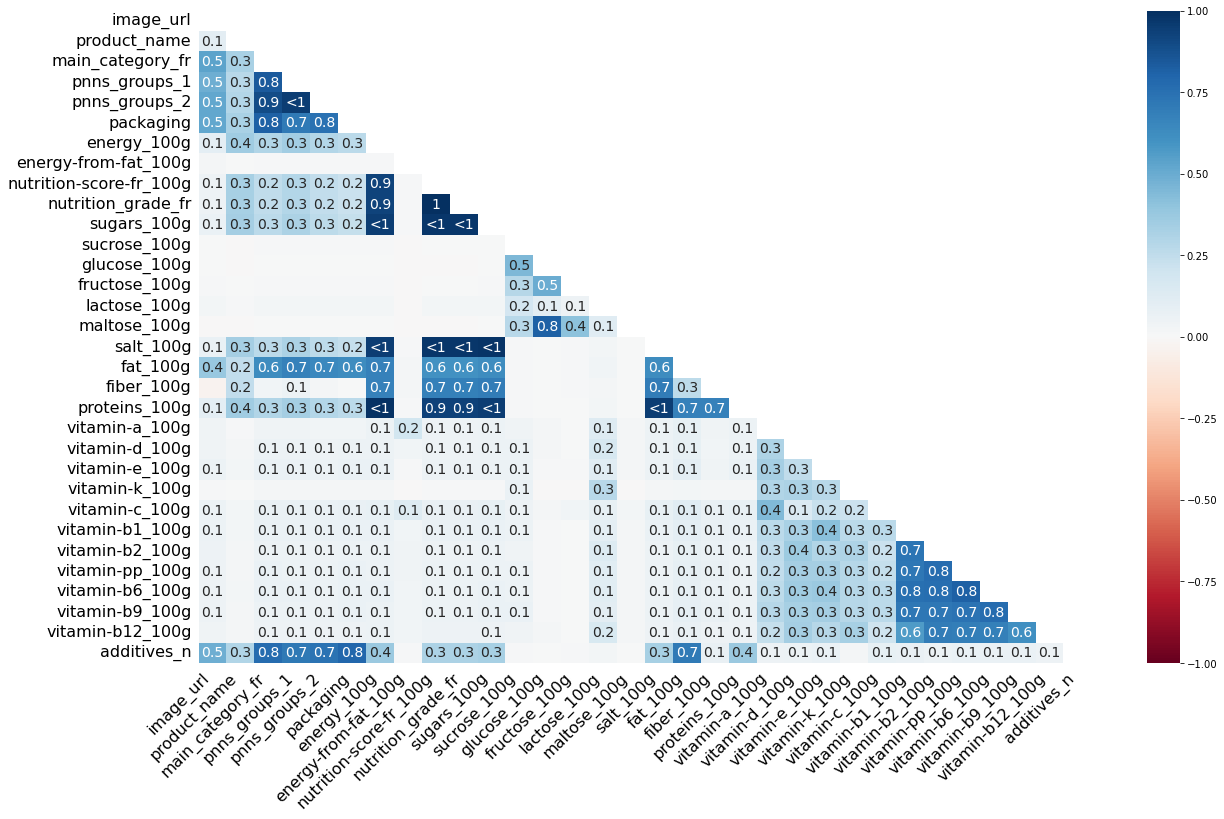

In [26]:
msno.heatmap(data_france)

<AxesSubplot:>

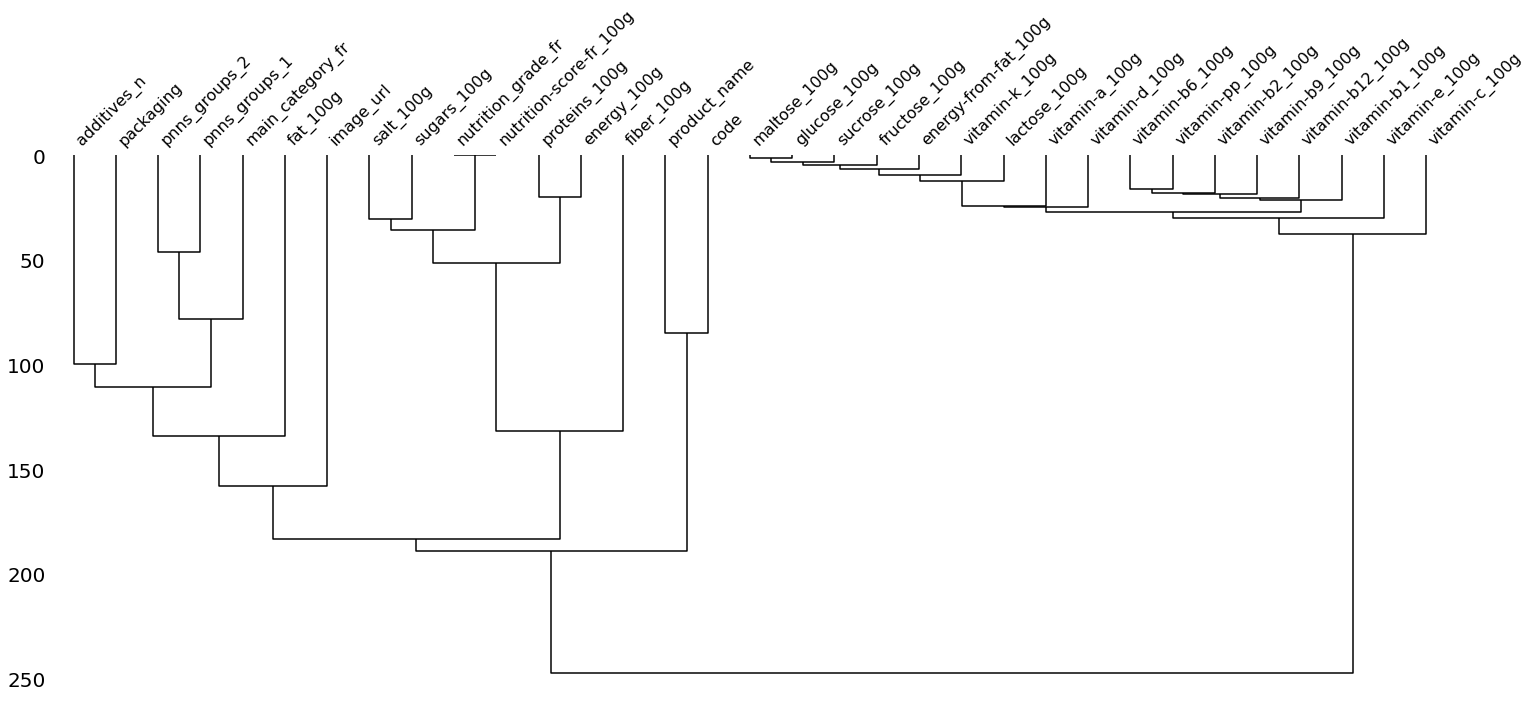

In [27]:
msno.dendrogram(data_france)

**Supprimer les colonnes suivant le taux de remplissage**

In [28]:
# Calcul du taux de remplissage  par colonne
def taux_remplissage_par_colonne(data):
    plt.figure(figsize=(15, 5))
    G = gridspec.GridSpec(1, 1)

    ax = plt.subplot(G[0, :])
    taux_remplissage = 100-data.isna().mean()*100
    ax = taux_remplissage.plot(kind='bar', color='red')
    ax.set_title('Taux de remplissage par colonne')
    ax.set_xlabel('Colonne')
    ax.set_ylabel('Taux de remplissage')
    ax.grid(True)
    fichier ='taux_remplissage'+'.png'
    plt.savefig(fichier)
    plt.show()

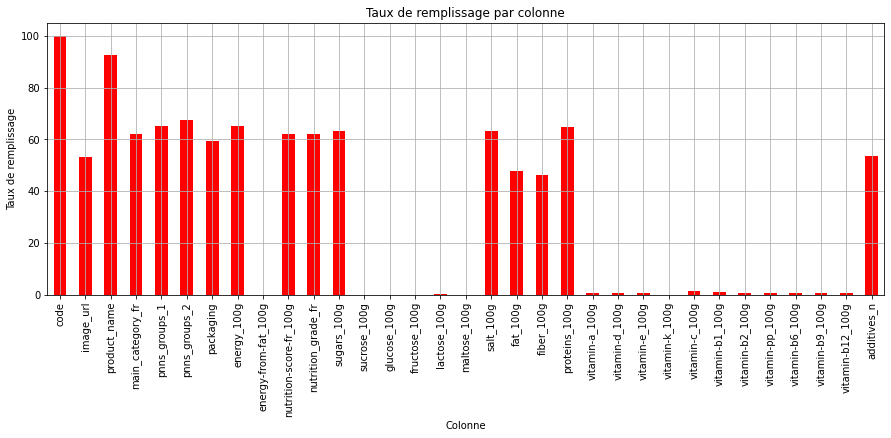

In [29]:
taux_remplissage_par_colonne(data_france)

In [30]:
data_france[vitamine].isnull().mean()

vitamin-a_100g      0.993889
vitamin-d_100g      0.993879
vitamin-e_100g      0.991790
vitamin-k_100g      0.999256
vitamin-c_100g      0.986620
vitamin-b1_100g     0.991076
vitamin-b2_100g     0.993279
vitamin-pp_100g     0.992627
vitamin-b6_100g     0.992266
vitamin-b9_100g     0.992876
vitamin-b12_100g    0.994251
dtype: float64

In [31]:
data_france[sucre].isnull().mean()

sugars_100g      0.368628
sucrose_100g     0.999866
glucose_100g     0.999938
fructose_100g    0.999752
lactose_100g     0.998511
maltose_100g     0.999959
dtype: float64

In [32]:
# récuperer et supprimer les colonnes avec valeurs manquantes > 80%
column_with_nan = data_france.columns[data_france.isnull().any()]
for column in column_with_nan:
    if (data_france[column].isnull().mean()) > 0.8:
        print('colonne à supprimer : ',column)
        data_france.drop(column,axis=1, inplace=True)

colonne à supprimer :  energy-from-fat_100g
colonne à supprimer :  sucrose_100g
colonne à supprimer :  glucose_100g
colonne à supprimer :  fructose_100g
colonne à supprimer :  lactose_100g
colonne à supprimer :  maltose_100g
colonne à supprimer :  vitamin-a_100g
colonne à supprimer :  vitamin-d_100g
colonne à supprimer :  vitamin-e_100g
colonne à supprimer :  vitamin-k_100g
colonne à supprimer :  vitamin-c_100g
colonne à supprimer :  vitamin-b1_100g
colonne à supprimer :  vitamin-b2_100g
colonne à supprimer :  vitamin-pp_100g
colonne à supprimer :  vitamin-b6_100g
colonne à supprimer :  vitamin-b9_100g
colonne à supprimer :  vitamin-b12_100g


In [33]:
data_france.isnull().mean()

code                       0.000000
image_url                  0.468535
product_name               0.074191
main_category_fr           0.377283
pnns_groups_1              0.347038
pnns_groups_2              0.324734
packaging                  0.406845
energy_100g                0.347823
nutrition-score-fr_100g    0.379940
nutrition_grade_fr         0.379940
sugars_100g                0.368628
salt_100g                  0.368276
fat_100g                   0.522469
fiber_100g                 0.537338
proteins_100g              0.350615
additives_n                0.462982
dtype: float64

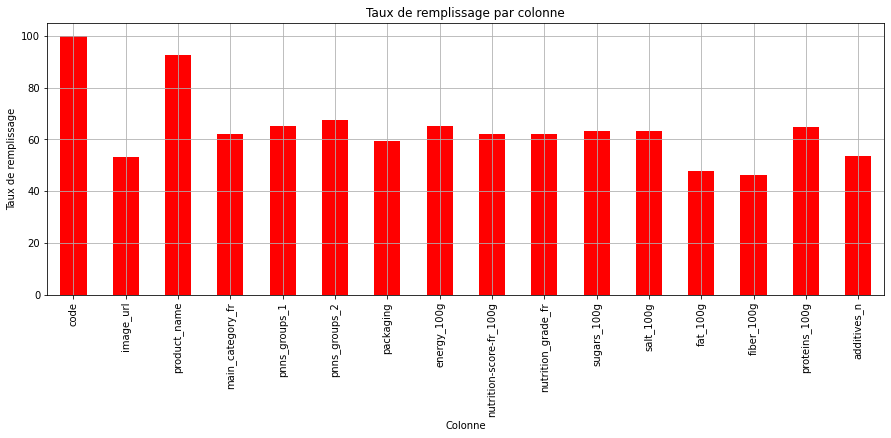

In [34]:
# Calcul du taux de remplissage  par colonne après suppression

taux_remplissage_par_colonne(data_france)

**Traitement de la colonne 'additives_n'**

Si le nombre d'additifs d'un produit est manquant, on peut supposer soit que ce nombre n'est pas connu, soit qu'il n'y a pas d'additifs. Je vais remplacer les valeurs manquantes par la valeur '0'.

In [35]:
data_france['additives_n'] = data_france['additives_n'].fillna(0)

**Traitement de la colonne 'product_name'**

On ne peut pas inventer le nom d'un produit.
Si le nom est manquant on va le remplacer par  son code

In [36]:
data_france['product_name'] = data_france['product_name'].fillna(data_france['code'])

**Traitement de la colonne 'image_url'**

In [37]:
data_france['image_url'] = data_france['image_url'].fillna('image de produit non disponible')

**Traitement de la colonne 'main_category_fr'**

In [38]:
data_france['main_category_fr'].unique().tolist()

[nan,
 'Filet-de-boeuf',
 'Aliments et boissons à base de végétaux',
 'Root-bier',
 'Sablés',
 'Bonbons',
 'Thés',
 'Sirops',
 'Sodas',
 'Sodas aux fruits',
 'Gâteaux',
 'Pâtisseries',
 'Viandes',
 'Produits à tartiner',
 'Poissons et viandes et oeufs',
 'Pate-au-foie-de-canard',
 'Condiments',
 'Cookies',
 'Plats à base de viande',
 'en:Carrot-coriander-soup',
 'en:Charcuteries',
 'Soupes',
 'Chocolats',
 'Boissons',
 'Sandwichs',
 'en:Harengs',
 'Fromages de vache',
 'it:Vinaigre-balsamique',
 'Pâtes à tartiner',
 'en:Petit-dejeuners',
 'Chips et frites',
 'Surgelés',
 'Sauce-aux-piments',
 'Epicerie',
 'Crustacés',
 'Biscuits',
 'en:Vanilla-soymilk',
 'Snacks salés',
 'Fruits à coques',
 'Vinaigres',
 'Fromages',
 'Nuggets-de-dinde',
 'Snacks sucrés',
 'Petit-déjeuners',
 'Pancake',
 'Conserves',
 'en:Coconut-creams',
 'Laits',
 'Jus de fruits',
 'Jus-de-noix-de-coco',
 'en:Coconut-waters',
 'Beurres',
 'Sodas light',
 'Pâtes alimentaires',
 'Pain-a-l-ail',
 'Compléments alimentaire

Remplacer les valeurs manquantes par "unknown"

In [39]:
data_france['main_category_fr'] = data_france['main_category_fr'].fillna('unknown')

**Traitement de la colonne 'pnns_groups_1'**

In [40]:
data_france['pnns_groups_1'].unique().tolist()

[nan,
 'unknown',
 'Cereals and potatoes',
 'Sugary snacks',
 'Beverages',
 'Fish Meat Eggs',
 'Composite foods',
 'Fruits and vegetables',
 'Milk and dairy products',
 'Salty snacks',
 'Fat and sauces',
 'fruits-and-vegetables',
 'sugary-snacks',
 'cereals-and-potatoes']

Nous remarquons que parmis les valeurs de cette colonne  il y a la valeur 'unknown'. 
Je vais remplacer les valeurs manquantes par cette valeur

In [41]:
data_france['pnns_groups_1'] = data_france['pnns_groups_1'].fillna('unknown')

**Traitement de la colonne 'pnns_groups_2'**

In [42]:
data_france['pnns_groups_2'].unique().tolist()

[nan,
 'unknown',
 'Legumes',
 'Biscuits and cakes',
 'Sweets',
 'Non-sugared beverages',
 'Sweetened beverages',
 'Meat',
 'One-dish meals',
 'Soups',
 'Chocolate products',
 'Alcoholic beverages',
 'Sandwich',
 'Cheese',
 'Appetizers',
 'Dressings and sauces',
 'Dried fruits',
 'Nuts',
 'Breakfast cereals',
 'Fruits',
 'Fruit juices',
 'Fats',
 'Cereals',
 'Pizza pies and quiche',
 'Vegetables',
 'Bread',
 'Processed meat',
 'vegetables',
 'Ice cream',
 'Fish and seafood',
 'pastries',
 'Milk and yogurt',
 'Dairy desserts',
 'Tripe dishes',
 'Artificially sweetened beverages',
 'Fruit nectars',
 'Potatoes',
 'Eggs',
 'Salty and fatty products',
 'fruits',
 'legumes',
 'cereals']

De la meme facon que la colonne  'pnns_groups_1', je vais traiter la colonne 'pnns_groups_2'

In [43]:
data_france['pnns_groups_2'] = data_france['pnns_groups_2'].fillna('unknown')

**Traitement de la colonne 'packaging'**

Je m'interrese qu'à l'emballage en plastique.
Si la valeur renseignée contient le mot "plast", je la remplace par 1, si non par 0

In [44]:
data_france['packaging'] = np.where(data_france['packaging'].str.contains('plast') , 1,0)

**Traitement des colonnes 'sugars_100g', 'salt_100g', 'fiber_100g' et 'proteins_100g' avec la mediane**


Je vais regrouper les produits par catégories, puis remplacer les valeurs manquantes des colonnes 'sugars_100g', 'salt_100g', 'fiber_100g' et 'proteins_100g' par la mediane du groupe.
J'ai choisi la médiane  et non pas la moyenne parcequ'elle est est non influencée par les valeurs aberrantes.

In [45]:
def imputation_mediane(df,col):
  df[col].fillna(df.groupby('main_category_fr')[col].transform('median'), inplace = True)
  # Il reste quelques valeurs nulles dont le groupement n'a pa de mediane. On les remplace par 0
  df[col].fillna(0, inplace = True)



In [46]:
def distribution_avant_apres(df_avant, df_apres, colonne_cible):
  colonne_cible_apres_imputation = colonne_cible+'_apres_imputation'
  sns.kdeplot(colonne_cible, data = df_avant, label=colonne_cible)
  sns.kdeplot(colonne_cible, data = df_apres, label=colonne_cible_apres_imputation)
  plt.title(f'comparaison des distributions prediction colonne {colonne_cible}')
  plt.legend()
  fichier = 'ancien_nouveau_'+colonne_cible+'.png'
  plt.savefig(fichier)
  plt.show()

In [47]:
 
colonnes_median = ['sugars_100g','salt_100g','fiber_100g','proteins_100g']
# garder une copie des données avant imputation
data_france_median = data_france[colonnes_median].copy()
# imputation par la mediane des categories (groupby sur la colonne 'main_category_fr')
for col in colonnes_median:
  imputation_mediane(data_france,col)
# 2eme copie après imputation pour faire la comparaison des distributins
data_france_median_imputed = data_france[colonnes_median].copy()

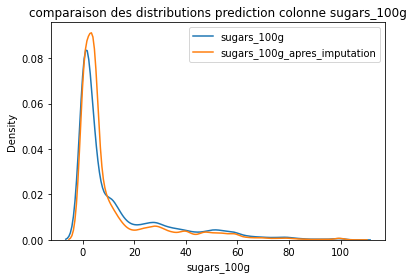

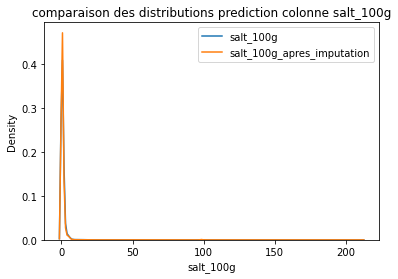

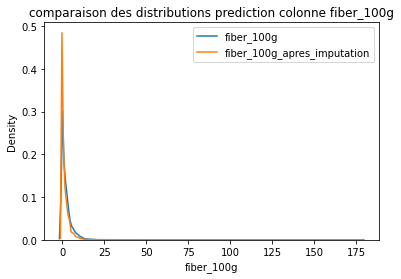

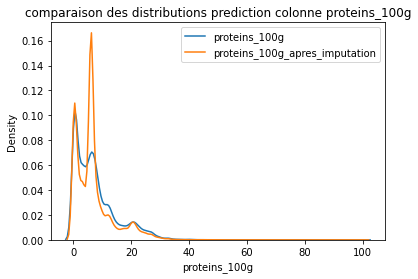

In [48]:
for colonne_cible in colonnes_median:
  distribution_avant_apres(data_france_median, data_france_median_imputed, colonne_cible)

Nous remarquons bien que nous gardon presque la meme forme que la distribution avant l'imputation.

**Traitement des colonnes 'energy_100g', 'nutrition-score-fr_100g'  et 'fat_100g' avec  KNN**

Ces colonnes numériques dépandent des autres colonnes. J'ai choisi le KNN comme méthode d'imputaion parcequ'il tient en compte cette dépandance.

In [49]:
def imputation_knn(df, colonne_cible):
  # selectionner les lignes ou la colonne_cible n'est pas nulle
  data_cible_index= df[df[colonne_cible].notna()].index
  # supprimer toutes les valeurs manquantes
  df_cible_index = df.loc[data_cible_index,colonnes_knn]
  df_cible_index = df_cible_index.dropna()
  data_colonne_cible = df_cible_index[colonne_cible]
  # supprimer la colonne cible
  del df_cible_index[colonne_cible]
  xtrain, xtest, ytrain, ytest = train_test_split(df_cible_index, data_colonne_cible, train_size=0.8)
  knn = neighbors.KNeighborsRegressor(n_neighbors=6)
  knn.fit(xtrain, ytrain)
  # Score R^2
  #print('\tscore R^2 : ',knn.score(xtest, ytest))
  # prédiction des valeurs manquantes pour la colonne_cible
  #df_apres_imputation = pd.DataFrame(columns=colonne_cible)
  df_apres_imputation=knn.predict(df[df_cible_index.columns.to_list()].fillna(value=0))
  return df_apres_imputation

In [50]:

colonnes_knn = ['energy_100g','nutrition-score-fr_100g','fat_100g']
data_france_knn = data_france[colonnes_knn].copy()
data_france_knn_apres_imputation=data_france_knn.copy()

for colonne_cible in colonnes_knn:
    data_france_knn_apres_imputation[colonne_cible] = imputation_knn(data_france, colonne_cible)

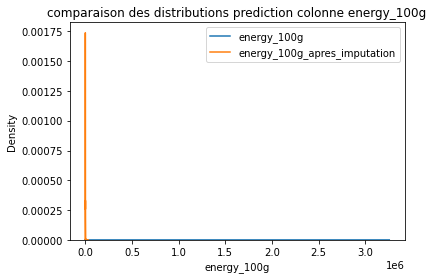

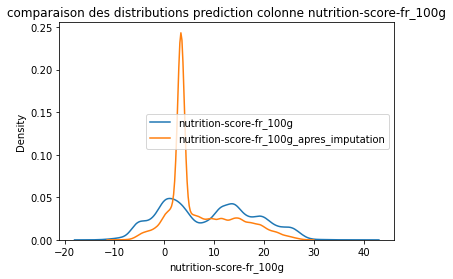

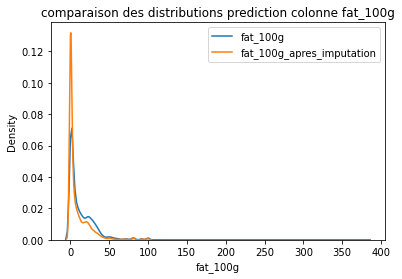

In [51]:
for colonne_cible in colonnes_knn:
  distribution_avant_apres(data_france_knn, data_france_knn_apres_imputation, colonne_cible)

Nous remarquons bien que nous gardon presque la meme forme que la distribution avant l'imputation à l'exception de 'energy_100g'.

In [52]:
for colonne in colonnes_knn:
    data_france[colonne] = data_france_knn_apres_imputation[colonne]


**Traitement de la colonne 'nutriscore_grade'**

In [53]:
pd.crosstab(data_france['nutrition_grade_fr'], data_france['nutrition-score-fr_100g']).T

nutrition_grade_fr,a,b,c,d,e
nutrition-score-fr_100g,,,,,
-9.500000,17,0,0,0,0
-8.500000,8,0,0,0,1
-8.000000,2,0,0,0,0
-7.833333,1,0,0,0,0
-7.666667,2,0,0,0,0
...,...,...,...,...,...
27.333333,0,0,2,1,12
27.500000,0,0,0,0,19
27.666667,0,0,0,0,3


A partir de ce tableau, on peut completer les valeurs manquantes de la colonne 'nutrition_grade_fr' et corriger la grade de nutrition des produits mal classés

In [54]:
data_france['nutrition_grade_fr'] = np.where(
   data_france['nutrition-score-fr_100g'] <=-1 , 'a', np.where(
   (data_france['nutrition-score-fr_100g'] <=2) & (data_france['nutrition-score-fr_100g'] >-1) , 'b',np.where(
   (data_france['nutrition-score-fr_100g'] <=10) & (data_france['nutrition-score-fr_100g'] >2) , 'c',np.where(
   (data_france['nutrition-score-fr_100g'] <=18) & (data_france['nutrition-score-fr_100g'] >10) , 'd','e')))
   )

In [55]:
data_france[['nutrition_grade_fr','nutrition-score-fr_100g']]

,nutrition_grade_fr,nutrition-score-fr_100g
0,c,3.333333
46,c,3.333333
48,c,3.333333
106,d,13.166667
136,c,3.333333
...,...,...
320761,c,3.333333
320763,a,-1.333333
320764,c,3.333333
320765,c,3.333333


In [56]:
# verifier s'il y a des données manquantes
data_france.isnull().mean()

code                       0.0
image_url                  0.0
product_name               0.0
main_category_fr           0.0
pnns_groups_1              0.0
pnns_groups_2              0.0
packaging                  0.0
energy_100g                0.0
nutrition-score-fr_100g    0.0
nutrition_grade_fr         0.0
sugars_100g                0.0
salt_100g                  0.0
fat_100g                   0.0
fiber_100g                 0.0
proteins_100g              0.0
additives_n                0.0
dtype: float64

In [57]:
data_france.shape

(96710, 16)

# Analyse valeur aberrante

**Variables quantitatives**

**Boite à moustaches**

In [58]:
colonnes_moustaches = data_france.select_dtypes(include=[np.number]).columns.tolist()
colonnes_moustaches.remove('packaging')

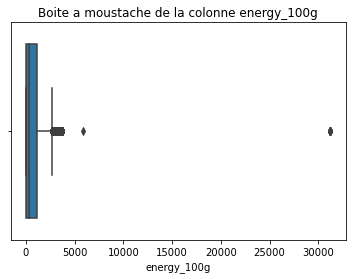

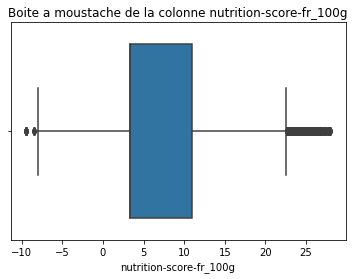

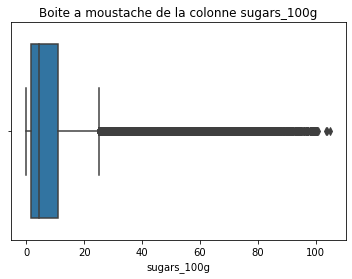

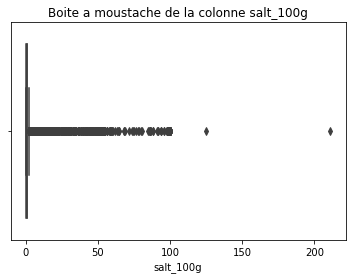

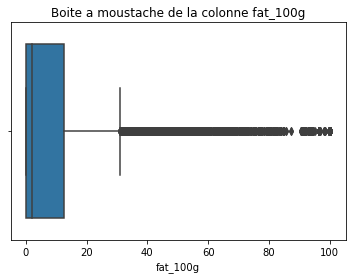

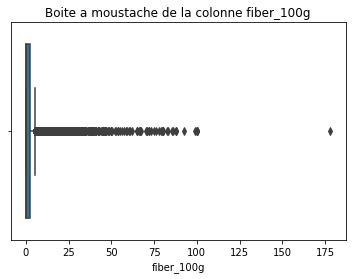

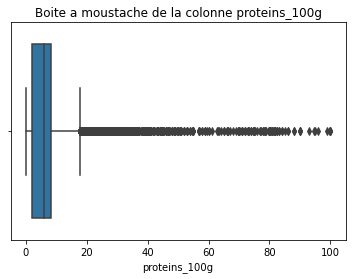

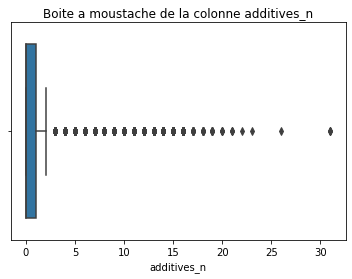

In [59]:
for colonne in colonnes_moustaches:
    sns.boxplot(x=colonne, data = data_france)
    plt.title(('Boite a moustache de la colonne ' + colonne))
    fichier ='moustache_'+colonne+'.png'
    plt.savefig(fichier)
    plt.show()

D'après ces boites à moustaches, nous observons qu'il ya des valeurs aberrantes pour la majorité des colonnes.
Mais je vais vérifier colonne par colonne pour ne pas supprimer les valeurs atypiques.

**Traitement commun des colonnes dont le poids est > 100g ou négatif**

si  poids > 100g ou poids < 0 alors c'est une valeur aberrante à supprimer.

In [60]:
# Liste des colonnes dont on doit vérifier le poids
colonnes_verifier_poids = ['sugars_100g','salt_100g','fat_100g','fiber_100g','proteins_100g']

In [61]:
# recupérer l'index de ces valeurs aberrantes
index_poids = data_france[(data_france[colonnes_verifier_poids] > 100).any(axis=1) | (data_france[colonnes_verifier_poids] < 0).any(axis=1)].index

In [62]:
# supprimer les lignes correspondants
data_france = data_france.drop(index_poids)

**Traitement de la colonne 'energy_100g'**

Le nutriment le plus energitique est le lipide (9 kcal pour 1 g) donc l'energie maximale pour 100g que peut avoir un produit si l'on suppose qu'il est constitué de 100% de lipides est 900 Kcal (=900*4.184=3765,6 kJ).

Toutes les valeurs supérieures à 3766 kJ seront remplacées par cette dernière.

In [63]:
data_france['energy_100g'].mean()

640.4588397376727

In [64]:
data_france['energy_100g'] = [3766 if val > 3766 else val for val in data_france['energy_100g']]

**Traitement de la colonne 'proteins_100g'**

D'après une recherche sur le net, la teneur maximale en protéines pour 100 grammes d'un aliment est d'environ 87. 
On ne s'interresse pas aux produits de musculation.
Toutes les valeurs supérieures à 87 seront considérées comme des valeurs aberrantes et donc remplacées par cette dernière.

In [65]:
data_france['proteins_100g'] = [87 if val > 87 else val for val in data_france['proteins_100g']]

**Traitement de la colonne 'fiber_100g'**

D'après une recherche sur le net, la teneur maximale en fibres pour 100 grammes d'un aliment est d'environ 44. 
Toutes les valeurs supérieures à 44 seront considérées comme des valeurs aberrantes et donc remplacées par cette dernière.

In [66]:
data_france['fiber_100g'] = [44 if val > 44 else val for val in data_france['fiber_100g']]

**Traitement de la colonne 'additives_n'**

Le nombre maximal d'additifs est 31 sur environs 300 additifs autorisés en Europe.
Je vais garder cette colonne telle quelle est. Les produits contenant plus d'additifs seront déconseillés par mon application.

In [67]:
data_france['additives_n'].max()

31.0

**Traitement des colonnes sugars_100g', 'salt_100g' et 'fat_100g'**

Aucun traitement pour ces colonnes à part la vérification déjà faite du poids (ne doit pas être négatif et ne doit pas dépasser 100g).
En effet, un produit(le sel) peut contenir 100% de sel. De même pour les sucre et la graisse.
Je vais garder ces colonne telles quelles sont. Les produits contenant plus de sucres, de sels et de graisses seront déconseillés par mon application.

**Traitement de la colonne 'packaging'**

Le traitement de cette colonne a été fait dans la partie des valeurs manquantes.
l'emballage d'un produit contient ou non du plastique.

**Variables qualitatives**

**Traitement de la colonne 'code'**

Si le nombre de caractères du code est inférieur à 2, on le concaténe avec la chaine "0000000000".

In [68]:
data_france[data_france['code'].str.len() <= 2]

,code,image_url,product_name,main_category_fr,pnns_groups_1,pnns_groups_2,packaging,energy_100g,nutrition-score-fr_100g,nutrition_grade_fr,sugars_100g,salt_100g,fat_100g,fiber_100g,proteins_100g,additives_n
174522,1,image de produit non disponible,Pot au feu dégraissé,unknown,unknown,unknown,0,33.166667,3.333333,c,4.5,0.52,0.0,0.2,6.1,0.0
175269,20,image de produit non disponible,20,unknown,unknown,unknown,1,33.166667,3.333333,c,4.5,0.52,0.0,0.2,6.1,0.0
269126,5,image de produit non disponible,Äpfel,unknown,unknown,unknown,0,33.166667,3.333333,c,4.5,0.52,0.0,0.2,6.1,0.0


In [69]:
data_france['code'] = ['0000000000'+str(val) if len(val) <= 2  else val for val in data_france['code']]

**Traitement de la colonne 'product_name'**

Si le nombre de caractères du nom est inférieur à 2, on le concaténe avec le code comme on l'a déjà fait pour les valeurs manquantes

In [70]:
data_france[data_france['product_name'].str.len() <= 2]

,code,image_url,product_name,main_category_fr,pnns_groups_1,pnns_groups_2,packaging,energy_100g,nutrition-score-fr_100g,nutrition_grade_fr,sugars_100g,salt_100g,fat_100g,fiber_100g,proteins_100g,additives_n
625,00052337,http://fr.openfoodfacts.org/images/products/00...,,unknown,unknown,unknown,1,33.166667,3.333333,c,4.5,0.5200,0.000000,0.2,6.1,0.0
13086,0016165003060,image de produit non disponible,Fe,unknown,unknown,unknown,1,33.166667,3.333333,c,4.5,0.5200,0.000000,0.2,6.1,0.0
90235,0075707098155,image de produit non disponible,H,unknown,unknown,unknown,0,33.166667,3.333333,c,4.5,0.5200,0.000000,0.2,6.1,0.0
174380,0951600600537,http://fr.openfoodfacts.org/images/products/09...,ok,unknown,unknown,unknown,1,33.166667,3.333333,c,4.5,0.5200,0.000000,0.2,6.1,0.0
175269,000000000020,image de produit non disponible,20,unknown,unknown,unknown,1,33.166667,3.333333,c,4.5,0.5200,0.000000,0.2,6.1,0.0
191776,3061990141415,image de produit non disponible,bn,unknown,unknown,unknown,1,33.166667,3.333333,c,4.5,0.5200,0.000000,0.2,6.1,0.0
192547,3080216039657,image de produit non disponible,K,unknown,unknown,unknown,1,33.166667,3.333333,c,4.5,0.5200,0.000000,0.2,6.1,0.0
196749,3168930501732,image de produit non disponible,3d,unknown,unknown,unknown,1,33.166667,3.333333,c,4.5,0.5200,0.000000,0.2,6.1,0.0
201117,3222474768546,image de produit non disponible,P,unknown,unknown,unknown,1,33.166667,3.333333,c,4.5,0.5200,0.000000,0.2,6.1,0.0
236774,3527615523313,image de produit non disponible,O,Boissons,unknown,Alcoholic beverages,0,33.166667,3.333333,c,8.0,0.0250,0.000000,0.0,0.1,0.0


In [71]:
data_france['product_name'] = [data_france['code']+str(val) if len(val) <= 2  else val for val in data_france['product_name']]

**Traitement des  colonnes 'main_catgory_fr', 'pnns_groups_1' et 'pnns_groups_2'**

Aucun traitement à effectuer

**ré-indexer le dataframe après tous les traitements effectués**

In [72]:
data_france=data_france.reset_index(drop = True)
data_france.head()

,code,image_url,product_name,main_category_fr,pnns_groups_1,pnns_groups_2,packaging,energy_100g,nutrition-score-fr_100g,nutrition_grade_fr,sugars_100g,salt_100g,fat_100g,fiber_100g,proteins_100g,additives_n
0,0000000003087,image de produit non disponible,Farine de blé noir,unknown,unknown,unknown,1,33.166667,3.333333,c,4.5,0.52000,0.0,0.2,6.1,0.0
1,0000000024600,http://fr.openfoodfacts.org/images/products/00...,Filet de bœuf,Filet-de-boeuf,unknown,unknown,1,33.166667,3.333333,c,0.0,0.00000,0.0,0.0,0.0,0.0
2,0000000027205,http://fr.openfoodfacts.org/images/products/00...,0000000027205,unknown,unknown,unknown,1,33.166667,3.333333,c,4.5,0.52000,0.0,0.2,6.1,0.0
3,0000000036252,http://fr.openfoodfacts.org/images/products/00...,Lion Peanut x2,unknown,unknown,unknown,1,1789.333333,13.166667,d,57.5,0.09652,17.3,2.5,2.5,1.0
4,0000000039259,http://fr.openfoodfacts.org/images/products/00...,Twix x2,unknown,unknown,unknown,1,33.166667,3.333333,c,4.5,0.52000,0.0,0.2,6.1,0.0


In [73]:
data_france.shape

(96700, 16)

# Définition d'un score

**Normalisation**

In [74]:
data_france.describe()

,packaging,energy_100g,nutrition-score-fr_100g,sugars_100g,salt_100g,fat_100g,fiber_100g,proteins_100g,additives_n
count,96700.000000,96700.000000,96700.000000,96700.000000,96700.000000,96700.000000,96700.000000,96700.000000,96700.000000
mean,0.551396,636.768616,6.816748,11.263985,1.059092,8.796444,1.612292,7.092708,0.984043
std,0.497354,713.562246,6.544046,17.052401,4.704522,14.650254,3.101090,7.057048,2.081679
min,0.000000,4.166667,-9.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,33.166667,3.333333,1.500000,0.100000,0.000000,0.000000,2.000000,0.000000
50%,1.000000,352.333333,3.333333,4.500000,0.520000,2.100000,0.200000,6.100000,0.000000
75%,1.000000,1105.500000,11.000000,11.000000,1.000000,12.420833,2.100000,8.300000,1.000000
max,1.000000,3766.000000,28.000000,100.000000,100.000000,100.000000,44.000000,87.000000,31.000000


In [75]:
colonnes_numeriques= data_france.select_dtypes(include=[np.number]).columns.tolist()
colonnes_numeriques

['packaging',
 'energy_100g',
 'nutrition-score-fr_100g',
 'sugars_100g',
 'salt_100g',
 'fat_100g',
 'fiber_100g',
 'proteins_100g',
 'additives_n']

In [76]:
colonnes_minmax = colonnes_numeriques.copy()
# Je vais normaliser les  colonnes dans les ordre de grandeurs de la colonne 'nutrition-score-fr_100g' ([-15,40]).
# enlever la colonne 'packaging'. Traitement différent
colonnes_minmax.remove('packaging')
data_france_minmax = data_france[colonnes_minmax].copy()

# Methode Min-Max en indiquant min =-15 et max=40
scaler = preprocessing.MinMaxScaler(feature_range=(-15, 40))

data_france_minmax = scaler.fit_transform(data_france_minmax)

data_france_minmax = pd.DataFrame(data_france_minmax, 
                                columns=colonnes_minmax,
                                index =data_france.index.to_list())
data_france_minmax['additives_n']= data_france_minmax['additives_n'].astype(int)

In [77]:
data_france_minmax.head()

,energy_100g,nutrition-score-fr_100g,sugars_100g,salt_100g,fat_100g,fiber_100g,proteins_100g,additives_n
0,-14.576005,3.822222,-12.525,-14.714000,-15.000,-14.750,-11.143678,-15
1,-14.576005,3.822222,-15.000,-15.000000,-15.000,-15.000,-15.000000,-15
2,-14.576005,3.822222,-12.525,-14.714000,-15.000,-14.750,-11.143678,-15
3,11.100084,18.244444,16.625,-14.946914,-5.485,-11.875,-13.419540,-13
4,-14.576005,3.822222,-12.525,-14.714000,-15.000,-14.750,-11.143678,-15


In [78]:
# inverser les valeurs min et max des colonnes 'fiber_100g' et 'proteins_100g'. Plus le produit contient de fibres ou de proteines plus le score sera inférieur
#newvalue= (max'-min')/(max-min)*(value-max)+max'

def func_reverse_minmax(x):
    return -(x-40)-15

data_france_minmax['fiber_100g'] = data_france_minmax['fiber_100g'].apply(func_reverse_minmax)
data_france_minmax['proteins_100g'] = data_france_minmax['proteins_100g'].apply(func_reverse_minmax)

In [79]:
# changer les valeurs de la colonne 'packagings'. Si elle contient du plastique, sa valeur sera 40 (mauvais score). si non -15 (meilleur score)

data_france['packaging'] = data_france['packaging'].apply(lambda x:40 if x ==1 else -15)

In [80]:
data_france_categor_num = data_france[['code','image_url','main_category_fr','product_name','pnns_groups_1','pnns_groups_2','nutrition_grade_fr','packaging']].copy()
data = data_france_categor_num.join(data_france_minmax)
data.head()

,code,image_url,main_category_fr,product_name,pnns_groups_1,pnns_groups_2,nutrition_grade_fr,packaging,energy_100g,nutrition-score-fr_100g,sugars_100g,salt_100g,fat_100g,fiber_100g,proteins_100g,additives_n
0,0000000003087,image de produit non disponible,unknown,Farine de blé noir,unknown,unknown,c,40,-14.576005,3.822222,-12.525,-14.714000,-15.000,39.750,36.143678,-15
1,0000000024600,http://fr.openfoodfacts.org/images/products/00...,Filet-de-boeuf,Filet de bœuf,unknown,unknown,c,40,-14.576005,3.822222,-15.000,-15.000000,-15.000,40.000,40.000000,-15
2,0000000027205,http://fr.openfoodfacts.org/images/products/00...,unknown,0000000027205,unknown,unknown,c,40,-14.576005,3.822222,-12.525,-14.714000,-15.000,39.750,36.143678,-15
3,0000000036252,http://fr.openfoodfacts.org/images/products/00...,unknown,Lion Peanut x2,unknown,unknown,d,40,11.100084,18.244444,16.625,-14.946914,-5.485,36.875,38.419540,-13
4,0000000039259,http://fr.openfoodfacts.org/images/products/00...,unknown,Twix x2,unknown,unknown,c,40,-14.576005,3.822222,-12.525,-14.714000,-15.000,39.750,36.143678,-15


**Score echolo_healathy**

Moyenne des colonnes numériques avec une pondération pour les deux colonnes 'nutrition-score-fr_100g' et 'packaging'

In [81]:
data['score_ecolo_healthy'] = (2*data.iloc[:,7] + 2*data.iloc[:,8] + data.iloc[:,9] + data.iloc[:,10] + data.iloc[:,11] + data.iloc[:,12] + data.iloc[:,13] + data.iloc[:,14] + data.iloc[:,15])/11

In [82]:
data.head()

,code,image_url,main_category_fr,product_name,pnns_groups_1,pnns_groups_2,nutrition_grade_fr,packaging,energy_100g,nutrition-score-fr_100g,sugars_100g,salt_100g,fat_100g,fiber_100g,proteins_100g,additives_n,score_ecolo_healthy
0,0000000003087,image de produit non disponible,unknown,Farine de blé noir,unknown,unknown,c,40,-14.576005,3.822222,-12.525,-14.714000,-15.000,39.750,36.143678,-15,6.665899
1,0000000024600,http://fr.openfoodfacts.org/images/products/00...,Filet-de-boeuf,Filet de bœuf,unknown,unknown,c,40,-14.576005,3.822222,-15.000,-15.000000,-15.000,40.000,40.000000,-15,6.788201
2,0000000027205,http://fr.openfoodfacts.org/images/products/00...,unknown,0000000027205,unknown,unknown,c,40,-14.576005,3.822222,-12.525,-14.714000,-15.000,39.750,36.143678,-15,6.665899
3,0000000036252,http://fr.openfoodfacts.org/images/products/00...,unknown,Lion Peanut x2,unknown,unknown,d,40,11.100084,18.244444,16.625,-14.946914,-5.485,36.875,38.419540,-13,16.266567
4,0000000039259,http://fr.openfoodfacts.org/images/products/00...,unknown,Twix x2,unknown,unknown,c,40,-14.576005,3.822222,-12.525,-14.714000,-15.000,39.750,36.143678,-15,6.665899


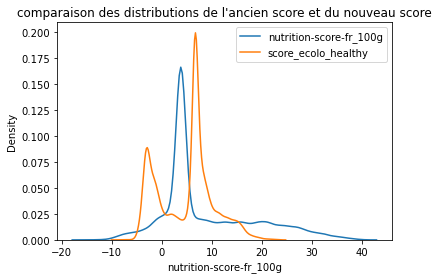

In [83]:
# Histogrammes de l'ancien score de nutrition et du nouveau score défini
sns.kdeplot('nutrition-score-fr_100g', data = data, label='nutrition-score-fr_100g')
sns.kdeplot('score_ecolo_healthy', data = data, label='score_ecolo_healthy')
plt.title('comparaison des distributions de l\'ancien score et du nouveau score')
plt.legend()
plt.savefig('anien_nouveau_nutrition_score.png')
plt.show()

Par rapport à l'ancien score, il y a apparition d'un deuxième pic dans l'histogramme. C'est à cause des valeurs de la colonnes 'packaging' qui contient seulement deux valeurs.

# Sauvegarde du jeu de données après nettoyage

In [84]:
# verifier s'il y a des données manquantes avant sauvegarde
data.isnull().mean()

code                       0.0
image_url                  0.0
main_category_fr           0.0
product_name               0.0
pnns_groups_1              0.0
pnns_groups_2              0.0
nutrition_grade_fr         0.0
packaging                  0.0
energy_100g                0.0
nutrition-score-fr_100g    0.0
sugars_100g                0.0
salt_100g                  0.0
fat_100g                   0.0
fiber_100g                 0.0
proteins_100g              0.0
additives_n                0.0
score_ecolo_healthy        0.0
dtype: float64

In [85]:
data.to_csv('data_france_nettoye.csv', sep='\t', encoding='utf_8',index=False)